In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('C:\\Users\\whals\\OneDrive\\바탕 화면\\석사\\7월공부\\밀가루 (2).csv',
                encoding='euc-kr')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              95 non-null     int64  
 1   Vareity           95 non-null     object 
 2   Color L           93 non-null     float64
 3   Color a           93 non-null     float64
 4   Color b           93 non-null     float64
 5   Protein           93 non-null     float64
 6   Ash               93 non-null     float64
 7   Wet Glueten       93 non-null     float64
 8   Peak time         93 non-null     float64
 9   Stability         93 non-null     float64
 10  Water absoprtion  93 non-null     float64
dtypes: float64(9), int64(1), object(1)
memory usage: 8.3+ KB


# 데이터 전처리

In [5]:
data[data['Color L'].isnull()]

,Year,Vareity,Color L,Color a,Color b,Protein,Ash,Wet Glueten,Peak time,Stability,Water absoprtion
17,2017,Hard White,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,2011,Hard White,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data1 = data.drop([17,47],axis=0)

In [7]:
tmp = data1.groupby('Vareity').mean()

In [8]:
tmp

,Year,Color L,Color a,Color b,Protein,Ash,Wet Glueten,Peak time,Stability,Water absoprtion
Vareity,,,,,,,,,,
Hard Red Spring,2009.736842,90.910526,-1.363158,9.242105,11.758421,0.489474,30.257895,6.636842,12.531579,62.263158
Hard Red Winter,2009.736842,91.973684,-2.263158,9.494737,9.326316,0.475789,24.884211,4.647368,9.536842,57.963158
Hard White,2009.235294,91.664706,-2.070588,7.647059,10.817647,0.449412,28.111765,7.358824,20.352941,61.017647
Soft Red Winter,2009.736842,92.536842,-2.910526,8.321053,8.257895,0.440000,22.000000,1.500000,2.694737,52.615789
Soft White,2009.736842,92.384211,-2.526316,7.968421,7.284211,0.426842,16.510526,1.347368,1.931579,50.984211


In [9]:
tmp.iloc[2,1:]

Color L             91.664706
Color a             -2.070588
Color b              7.647059
Protein             10.817647
Ash                  0.449412
Wet Glueten         28.111765
Peak time            7.358824
Stability           20.352941
Water absoprtion    61.017647
Name: Hard White, dtype: float64

In [10]:
data.iloc[17,2:] = tmp.iloc[2,1:]

In [11]:
data.iloc[47,2:] = tmp.iloc[2,1:]

In [12]:
data[data['Color L'].isnull()]

,Year,Vareity,Color L,Color a,Color b,Protein,Ash,Wet Glueten,Peak time,Stability,Water absoprtion


# PCA분석

In [13]:

data.head()

,Year,Vareity,Color L,Color a,Color b,Protein,Ash,Wet Glueten,Peak time,Stability,Water absoprtion
0,2020,Hard Red Winter,92.3,-0.7,7.9,10.70,0.40,29.5,6.7,10.6,61.4
1,2020,Hard Red Spring,91.0,-1.2,9.2,11.71,0.51,28.5,6.2,12.0,59.2
2,2020,Hard White,91.6,-1.8,8.8,11.40,0.48,24.8,7.5,10.5,60.4
3,2020,Soft White,91.7,-2.2,8.5,7.60,0.43,17.0,1.2,1.5,51.1
4,2020,Soft Red Winter,91.4,-2.4,9.2,7.50,0.41,20.4,1.2,1.6,52.4


In [14]:
from sklearn.preprocessing import StandardScaler  # 표준화 패키지 라이브러리 

x = data.drop(['Vareity','Year'], axis=1).values # 독립변인들의 value값만 추출
y = data['Vareity'].values # 종속변인 추출

x = StandardScaler().fit_transform(x) # x객체에 x를 표준화한 데이터를 저장


In [15]:
tmp1 = data.drop(['Vareity','Year'], axis=1)

In [16]:
features = tmp1.columns
df = pd.DataFrame(x, columns=features).head()

In [17]:
df

,Color L,Color a,Color b,Protein,Ash,Wet Glueten,Peak time,Stability,Water absoprtion
0,0.426630,2.077936,-0.621781,0.614215,-1.056072,0.938223,0.731729,0.138248,0.881531
1,-0.939405,1.397426,0.651809,1.126441,1.007177,0.755942,0.579407,0.300829,0.443870
2,-0.308928,0.580814,0.259935,0.969223,0.444472,0.081502,0.975444,0.126635,0.682594
3,-0.203848,0.036406,-0.033970,-0.957962,-0.493368,-1.340291,-0.943810,-0.918529,-1.167520
4,-0.519087,-0.235798,0.651809,-1.008678,-0.868504,-0.720535,-0.943810,-0.906917,-0.908902


In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['principal component1', 'principal component2'])
# 주성분으로 이루어진 데이터 프레임 구성

In [19]:
principalDf.head()

,principal component1,principal component2
0,1.625540,1.120987
1,2.278058,-0.938554
2,1.510192,-0.102202
3,-2.090091,-0.684047
4,-1.728280,-0.883085


In [20]:
finalDf = pd.concat([principalDf, data[['Vareity']]], axis = 1)

In [21]:
finalDf

,principal component1,principal component2,Vareity
0,1.625540,1.120987,Hard Red Winter
1,2.278058,-0.938554,Hard Red Spring
2,1.510192,-0.102202,Hard White
3,-2.090091,-0.684047,Soft White
4,-1.728280,-0.883085,Soft Red Winter
...,...,...,...
90,-0.397870,-0.073733,Hard Red Winter
91,2.663321,-0.665101,Hard Red Spring
92,2.294284,4.042128,Hard White
93,-3.843581,0.686012,Soft White


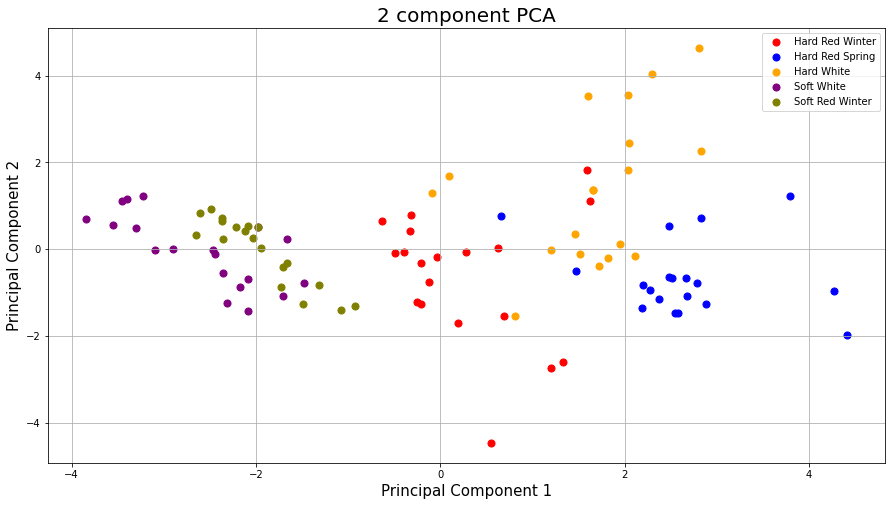

In [22]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize=20)

targets = ['Hard Red Winter','Hard Red Spring','Hard White','Soft White','Soft Red Winter']
colors = ['red','blue','orange','purple','olive']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Vareity'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component1']
               , finalDf.loc[indicesToKeep, 'principal component2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [23]:
data2 = pd.concat([principalDf, tmp1], axis=1)

In [24]:
data2

,principal component1,principal component2,Color L,Color a,Color b,Protein,Ash,Wet Glueten,Peak time,Stability,Water absoprtion
0,1.625540,1.120987,92.3,-0.7,7.9,10.70,0.40,29.5,6.7,10.6,61.4
1,2.278058,-0.938554,91.0,-1.2,9.2,11.71,0.51,28.5,6.2,12.0,59.2
2,1.510192,-0.102202,91.6,-1.8,8.8,11.40,0.48,24.8,7.5,10.5,60.4
3,-2.090091,-0.684047,91.7,-2.2,8.5,7.60,0.43,17.0,1.2,1.5,51.1
4,-1.728280,-0.883085,91.4,-2.4,9.2,7.50,0.41,20.4,1.2,1.6,52.4
...,...,...,...,...,...,...,...,...,...,...,...
90,-0.397870,-0.073733,92.9,-3.5,9.6,9.80,0.48,24.2,4.8,9.9,59.2
91,2.663321,-0.665101,90.5,-1.6,9.7,11.50,0.46,30.0,6.9,13.4,63.1
92,2.294284,4.042128,91.7,-2.1,6.4,10.20,0.39,23.6,17.8,32.6,59.2
93,-3.843581,0.686012,92.7,-2.8,7.7,6.90,0.38,15.8,1.3,1.9,43.0


In [25]:
import seaborn as sns

cols = data2.columns
corr = data2[cols].corr(method='pearson')
corr

,principal component1,principal component2,Color L,Color a,Color b,Protein,Ash,Wet Glueten,Peak time,Stability,Water absoprtion
principal component1,1.000000e+00,-3.000408e-17,-0.655939,0.723020,0.234977,0.832846,0.407071,0.894212,0.797961,0.660550,0.909545
principal component2,-3.000408e-17,1.000000e+00,0.467352,-0.233558,-0.769414,0.191346,-0.726605,0.102637,0.398793,0.565047,0.010326
Color L,-6.559386e-01,4.673518e-01,1.000000,-0.662179,-0.395296,-0.356354,-0.497123,-0.424803,-0.362578,-0.228795,-0.493600
Color a,7.230201e-01,-2.335580e-01,-0.662179,1.000000,0.230566,0.461832,0.304692,0.517854,0.436827,0.303596,0.626705
Color b,2.349774e-01,-7.694140e-01,-0.395296,0.230566,1.000000,0.103742,0.510892,0.142530,-0.072514,-0.184734,0.187303
Protein,8.328460e-01,1.913457e-01,-0.356354,0.461832,0.103742,1.000000,0.192925,0.819334,0.668109,0.552198,0.736729
Ash,4.070713e-01,-7.266048e-01,-0.497123,0.304692,0.510892,0.192925,1.000000,0.340132,0.056633,-0.122567,0.392230
Wet Glueten,8.942123e-01,1.026373e-01,-0.424803,0.517854,0.142530,0.819334,0.340132,1.000000,0.692549,0.582496,0.819461
Peak time,7.979607e-01,3.987929e-01,-0.362578,0.436827,-0.072514,0.668109,0.056633,0.692549,1.000000,0.738198,0.685762
Stability,6.605501e-01,5.650471e-01,-0.228795,0.303596,-0.184734,0.552198,-0.122567,0.582496,0.738198,1.000000,0.561187


In [26]:
corr = corr.iloc[:2,2:]

In [27]:
column_names = tmp1.columns
column_names1 = ['component 1','component2']

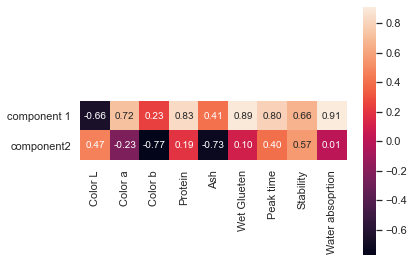

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# 레이블의 폰트 사이즈를 조정
sns.set(font_scale=1)
hm = sns.heatmap(corr.values, #데이터
            cbar=True, #오른쪽 컬러 막대 출력 여부
            annot=True, #차트에 숫자를 보여줄 것인지 여부
            square=True, #차트를 정사각형으로 할 것인지
            fmt='.2f', #숫자의 출력 소수점 자리 개수 조절
            annot_kws={'size': 10}, #숫자 출력 시 숫자 크기 조절
            yticklabels=column_names1, #y축에 컬럼명 출력
            xticklabels=column_names) #x축에 컬럼명 출력

plt.tight_layout()
plt.show()

In [ ]:
# 의사결정트리, K-최근접 이웃, SVM, 다층 퍼셉트론 신경망

# 의사결정트리

In [258]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [259]:
x_data = data.drop(['Year','Vareity'],axis=1)
y_data = data['Vareity']

In [260]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data,
                                                    random_state=42, stratify=y_data)

In [261]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=15,random_state=0)
model = tree.fit(x_train, y_train)

In [262]:
print('훈련 세트 정확도 :{:03f}'.format(tree.score(x_train,y_train)))
print('테스트 세트 정확도 :{:03f}'.format(tree.score(x_test,y_test)))

훈련 세트 정확도 :1.000000
테스트 세트 정확도 :0.958333


In [263]:
y_pred = tree.fit(x_train, y_train)

In [264]:
y_predict = y_pred.predict(x_test)

In [265]:
from sklearn.metrics import confusion_matrix
from pandas import DataFrame

In [266]:
cm = confusion_matrix(y_test,y_predict)

In [267]:
cm2 = DataFrame(cm, index=['Hard Red Winter','Hard Red Spring','Hard White','Soft White','Soft Red Winter'],
               columns = ['Hard Red Winter','Hard Red Spring','Hard White','Soft White','Soft Red Winter'])

In [268]:
cm2

,Hard Red Winter,Hard Red Spring,Hard White,Soft White,Soft Red Winter
Hard Red Winter,5,0,0,0,0
Hard Red Spring,0,4,0,0,0
Hard White,0,0,5,0,0
Soft White,0,0,0,5,0
Soft Red Winter,0,0,0,1,4


In [269]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

                 precision    recall  f1-score   support

Hard Red Spring       1.00      1.00      1.00         5
Hard Red Winter       1.00      1.00      1.00         4
     Hard White       1.00      1.00      1.00         5
Soft Red Winter       0.83      1.00      0.91         5
     Soft White       1.00      0.80      0.89         5

       accuracy                           0.96        24
      macro avg       0.97      0.96      0.96        24
   weighted avg       0.97      0.96      0.96        24



<AxesSubplot:title={'center':'Decision tree'}>

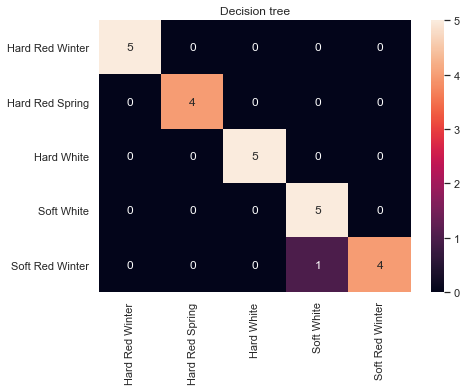

In [203]:
plt.figure(figsize = (7,5))
plt.title('Decision tree')
sns.heatmap(cm2, annot=True,)

# K-최근접 이웃

In [270]:
# k-최근접 이웃
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors =1)

In [271]:
clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [272]:
y_predict = clf.predict(x_test)

C:\Users\whals\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [273]:
cm = confusion_matrix(y_test,y_predict)

In [274]:
cm2 = DataFrame(cm, index=['Hard Red Winter','Hard Red Spring','Hard White','Soft White','Soft Red Winter'],
               columns = ['Hard Red Winter','Hard Red Spring','Hard White','Soft White','Soft Red Winter'])

In [275]:
print('훈련 세트 정확도 :{:03f}'.format(clf.score(x_train,y_train)))
print('테스트 세트 정확도 :{:03f}'.format(clf.score(x_test,y_test)))

훈련 세트 정확도 :1.000000
테스트 세트 정확도 :0.875000


C:\Users\whals\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\whals\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [276]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

                 precision    recall  f1-score   support

Hard Red Spring       0.80      0.80      0.80         5
Hard Red Winter       1.00      1.00      1.00         4
     Hard White       0.80      0.80      0.80         5
Soft Red Winter       0.83      1.00      0.91         5
     Soft White       1.00      0.80      0.89         5

       accuracy                           0.88        24
      macro avg       0.89      0.88      0.88        24
   weighted avg       0.88      0.88      0.87        24



<AxesSubplot:title={'center':'Decision tree'}>

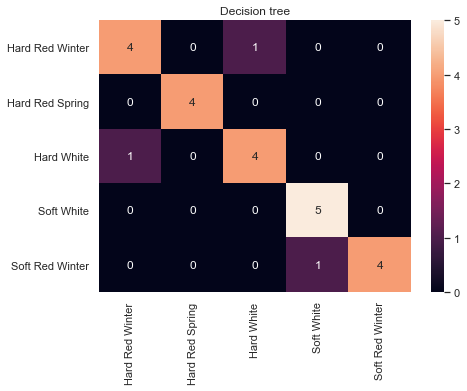

In [277]:
plt.figure(figsize = (7,5))
plt.title('Decision tree')
sns.heatmap(cm2, annot=True,)

# SVM

In [278]:
# SVM
from sklearn.svm import SVC

In [279]:
svc = SVC(kernel = 'rbf',C=10, gamma=0.1).fit(x_train, y_train)

In [280]:
y_predict = svc.predict(x_test)

In [281]:
cm = confusion_matrix(y_test,y_predict)

In [282]:
cm2 = DataFrame(cm, index=['Hard Red Winter','Hard Red Spring','Hard White','Soft White','Soft Red Winter'],
               columns = ['Hard Red Winter','Hard Red Spring','Hard White','Soft White','Soft Red Winter'])

In [283]:
print('훈련 세트 정확도 :{:03f}'.format(svc.score(x_train,y_train)))
print('테스트 세트 정확도 :{:03f}'.format(svc.score(x_test,y_test)))

훈련 세트 정확도 :1.000000
테스트 세트 정확도 :0.916667


In [284]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

                 precision    recall  f1-score   support

Hard Red Spring       1.00      0.80      0.89         5
Hard Red Winter       1.00      1.00      1.00         4
     Hard White       0.83      1.00      0.91         5
Soft Red Winter       0.83      1.00      0.91         5
     Soft White       1.00      0.80      0.89         5

       accuracy                           0.92        24
      macro avg       0.93      0.92      0.92        24
   weighted avg       0.93      0.92      0.92        24



<AxesSubplot:title={'center':'Decision tree'}>

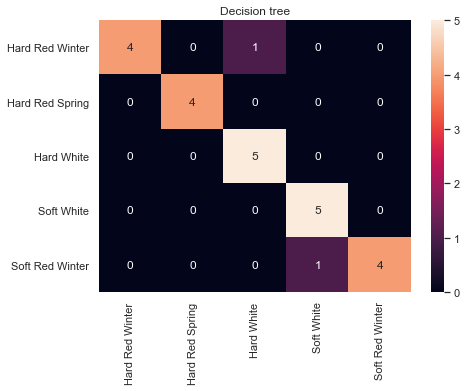

In [285]:
plt.figure(figsize = (7,5))
plt.title('Decision tree')
sns.heatmap(cm2, annot=True,)

# 다층 퍼셉트론 신경망

In [286]:
from sklearn.neural_network import MLPClassifier

In [287]:
mlp = MLPClassifier(solver='lbfgs', random_state=42,
                   hidden_layer_sizes=[10,10], max_iter=5000)

In [288]:
mlp.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=[10, 10], max_iter=5000, random_state=42,
              solver='lbfgs')

In [289]:
print('훈련 세트 정확도 :{:03f}'.format(mlp.score(x_train,y_train)))
print('테스트 세트 정확도 :{:03f}'.format(mlp.score(x_test,y_test)))

훈련 세트 정확도 :0.816901
테스트 세트 정확도 :0.791667


In [290]:
y_predict = mlp.predict(x_test)

In [291]:
cm = confusion_matrix(y_test,y_predict)

In [292]:
cm2 = DataFrame(cm, index=['Hard Red Winter','Hard Red Spring','Hard White','Soft White','Soft Red Winter'],
               columns = ['Hard Red Winter','Hard Red Spring','Hard White','Soft White','Soft Red Winter'])

In [293]:
mean_on_train = x_train.mean(axis=0)
std_on_train = x_train.std(axis=0)

In [294]:
X_train_scaled = (x_train - mean_on_train) / std_on_train
X_test_scaled = (x_test - mean_on_train) / std_on_train

In [295]:
mlp = MLPClassifier(solver='lbfgs', random_state=42,
                   hidden_layer_sizes=[10,10], max_iter=1000)

In [296]:
mlp.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=[10, 10], max_iter=1000, random_state=42,
              solver='lbfgs')

In [297]:
print('훈련 세트 정확도 :{:03f}'.format(mlp.score(X_train_scaled,y_train)))
print('테스트 세트 정확도 :{:03f}'.format(mlp.score(X_test_scaled,y_test)))

훈련 세트 정확도 :1.000000
테스트 세트 정확도 :0.958333


In [298]:
y_predict = mlp.predict(X_test_scaled)
cm = confusion_matrix(y_test,y_predict)

In [299]:
cm2 = DataFrame(cm, index=['Hard Red Winter','Hard Red Spring','Hard White','Soft White','Soft Red Winter'],
               columns = ['Hard Red Winter','Hard Red Spring','Hard White','Soft White','Soft Red Winter'])

In [300]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

                 precision    recall  f1-score   support

Hard Red Spring       1.00      1.00      1.00         5
Hard Red Winter       1.00      1.00      1.00         4
     Hard White       1.00      1.00      1.00         5
Soft Red Winter       0.83      1.00      0.91         5
     Soft White       1.00      0.80      0.89         5

       accuracy                           0.96        24
      macro avg       0.97      0.96      0.96        24
   weighted avg       0.97      0.96      0.96        24



<AxesSubplot:title={'center':'Decision tree'}>

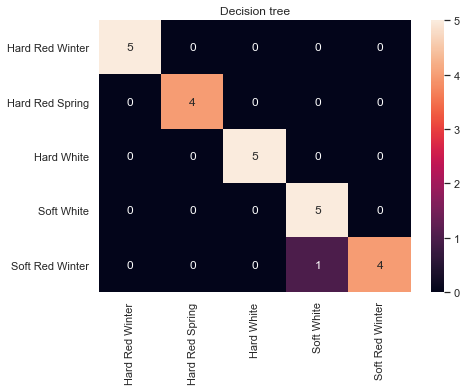

In [301]:
plt.figure(figsize = (7,5))
plt.title('Decision tree')
sns.heatmap(cm2, annot=True,)